<a href="https://colab.research.google.com/github/DaddyDogs/IS-2022-2023-Physics/blob/main/Quantum_mechanical_atomic_model_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0_%D0%95%D1%80%D0%BC%D0%BE%D0%BB%D0%B0%D0%B5%D0%B2%D0%B0_%D0%98%D0%BB%D1%8C%D1%8F%D1%81%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InlineBackend.figure_format = 'retina'

# Моделирование №1. Квантово-механическая модель атома

В данной модели считается, что водородоподобный атом состоит из двух точечных заряженных частиц: ядра с зарядом $q_1 = +e $ и электрона с зарядом $ q_2 = -e $, между зарядами которых существует кулоновское взаимодействие.

Ядро находится в начале координат и считается неподвижным, тогда движение электрона в поле ядра задается уравнением:

$\frac{-\hbar}{2m}Δψ-\frac{ze^2}{4πɛ_0r}ψ=Eψ$

Решения уравнения ищут в виде:

$ ψ(r, ϑ, 𝜑) = R(r) * Y(θ, 𝜑) $

R(r) - радиальная часть; Y(θ, 𝜑) - угловая часть, так называемые сферические функции

In [ ]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
e = math.exp(1)

## Часть 1.
Вычисление сферических функций, построение их полярных диаграмм и соответствующих форм орбиталей

In [ ]:

def corner_part(l, m, adjoint):
  phi = sp.Symbol('phi')
  if (adjoint):
    return normalization_factor(l, m) * Legendre_func(l, m) * math.exp(1) ** (-1j * phi * m)
  return normalization_factor(l, m) * Legendre_func(l, m) * math.exp(1) ** (1j * phi * m)



In [ ]:
def normalization_factor(l, m):
  return math.sqrt(math.factorial(l - abs(m)) * (2 * l + 1)/(math.factorial(l + abs(m)) * 4 * math.pi))

In [ ]:
def Legendre_polynom(l):
  x = sp.Symbol('x')
  f = lambda x: (x ** 2 - 1) ** l
  return sp.lambdify(x, 1/(2 ** l * math.factorial(l)) * sp.diff((x ** 2 - 1) ** l, x, l))

In [ ]:
def Legendre_func(l, m):
  x = sp.Symbol('x')
  y =  sp.lambdify(x, sp.diff(Legendre_polynom(l)(x), x, m))
  return (1 - sp.cos(x) ** 2) ** (abs(m) / 2) * y(sp.cos(x))

Вычисленные нормировочные коэффициенты:

In [ ]:
for l in range(0, 4):
  for m in range(0, l+1):
    print(l, m, normalization_factor(l, m))

0 0 0.28209479177387814
1 0 0.4886025119029199
1 1 0.3454941494713355
2 0 0.6307831305050401
2 1 0.25751613468212636
2 2 0.12875806734106318
3 0 0.7463526651802308
3 1 0.21545345607610045
3 2 0.06813236509555216
3 3 0.027814921575518937


Вычисленные полиномы Лежандра:

In [ ]:
x = sp.Symbol('x')
for l in range(0, 4):
  print(Legendre_polynom(l)(sp.cos(x)))

1.0
1.0*cos(x)
1.5*cos(x)**2 - 0.5
0.5*(5*cos(x)**2 - 3)*cos(x)


Вычисленные присоединенные полиномы Лежандра:
  

In [ ]:
for l in range (0, 4):
  for m in range(0, l+1):
    print(l, m, sp.simplify(Legendre_func(l,m)))

0 0 1.00000000000000
1 0 1.0*cos(x)
1 1 1.0*(sin(x)**2)**0.5
2 0 1.5*cos(x)**2 - 0.5
2 1 3.0*(sin(x)**2)**0.5*cos(x)
2 2 3.0*(sin(x)**2)**1.0
3 0 (2.5*cos(x)**2 - 1.5)*cos(x)
3 1 (7.5*cos(x)**2 - 1.5)*(sin(x)**2)**0.5
3 2 15.0*(sin(x)**2)**1.0*cos(x)
3 3 15.0*(sin(x)**2)**1.5


###Вычисленные значения $Y_{lm}({\theta, \phi} )$:

In [ ]:
for l in range (1, 4):
    res = corner_part(l,0, False)
    print(l, 0, res, res ** 2)
res = corner_part(3,1, False)
print(3, 1, res, res ** 2)


1 0 0.48860251190292*cos(x) 0.238732414637843*cos(x)**2
2 0 0.94617469575756*cos(x)**2 - 0.31539156525252 0.895246554891911*(cos(x)**2 - 0.333333333333333)**2
3 0 0.373176332590115*(5*cos(x)**2 - 3)*cos(x) 0.139260575205408*(5*cos(x)**2 - 3)**2*cos(x)**2
3 1 0.2154534560761*2.71828182845905**(1.0*I*phi)*(1 - cos(x)**2)**0.5*(7.5*cos(x)**2 - 1.5) 2.61113578510141*2.71828182845905**(2.0*I*phi)*(1 - cos(x)**2)**1.0*(cos(x)**2 - 0.2)**2


In [ ]:
def get_corner_part(l, m, theta):
  y = sp.lambdify(x, corner_part(l, m, False))(theta)
  return y, y * y

In [ ]:
def get_corner_part2(l, m, theta, phi):
  p = sp.Symbol('phi')
  y = sp.lambdify([x, p], corner_part(l, m, False))(theta, phi)
  return y, y * sp.lambdify([x, p], corner_part(l, m, True))(theta, phi)

In [ ]:
def plot_graphs(l, m):
  thetas = np.linspace(0, 100, 1000)
  diagram, orbitale = get_corner_part(l, m, thetas)
  fig = plt.figure(figsize=(5, 5))
  ax1 = plt.subplot(1, 1, 1, projection="polar")
  plt.title(f'Orbitale form for l = {l} and m = {m}')
  plt.polar(thetas, orbitale)
  fig = plt.figure(figsize=(5, 5))
  plt.polar(thetas, diagram)
  plt.title(f'Polar diagram of $Y_{l}^{m}$ ')

In [ ]:
def plot_graphs2(l, m):
  thetas = np.linspace(0, 100, 1000)
  phis = np.linspace(0, 100, 1000)
  diagram, orbitale = get_corner_part2(l, m, thetas, phis)
  fig = plt.figure(figsize=(5, 5))
  ax1 = plt.subplot(1, 1, 1, projection="polar")
  plt.title(f'Orbitale form for l = {l} and m = {m}')
  plt.polar(thetas, orbitale)
  fig = plt.figure(figsize=(5, 5))
  plt.polar(thetas, diagram)
  plt.title(f'Polar diagram of $Y_{l}^{m}$ ')

### Полярные диаграммы сферических функций и соответствующие формы орбиталей

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


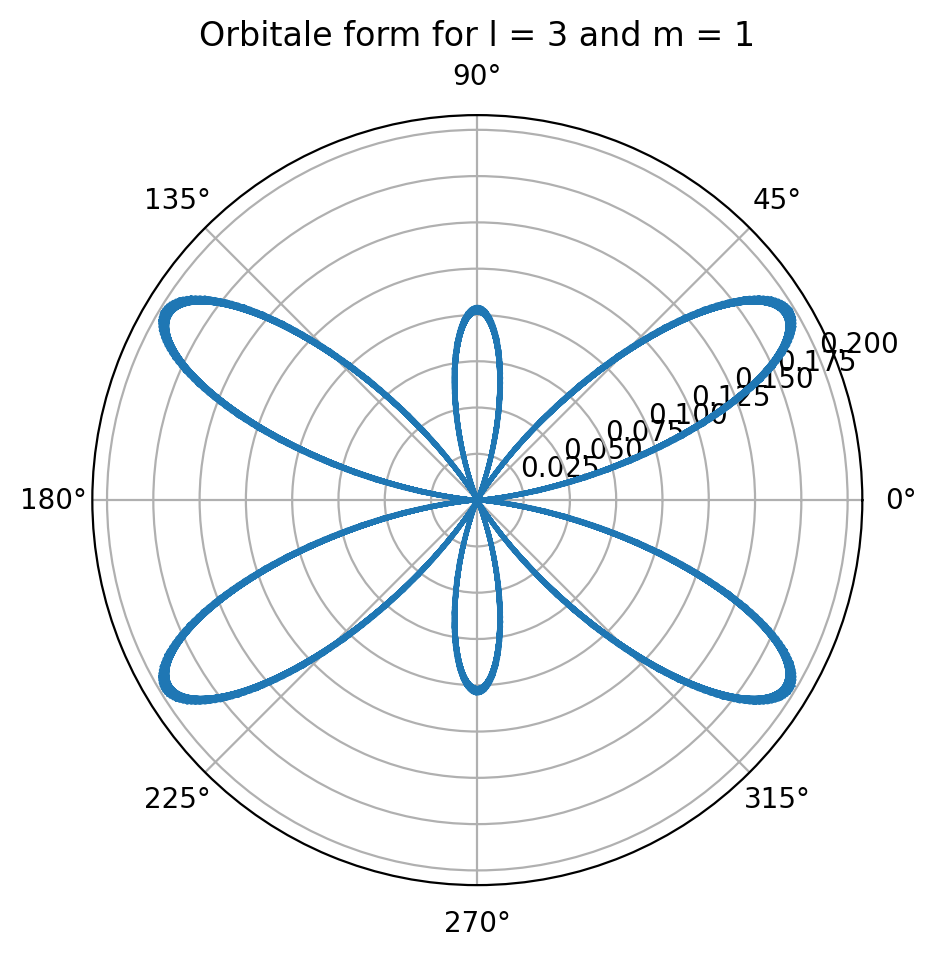

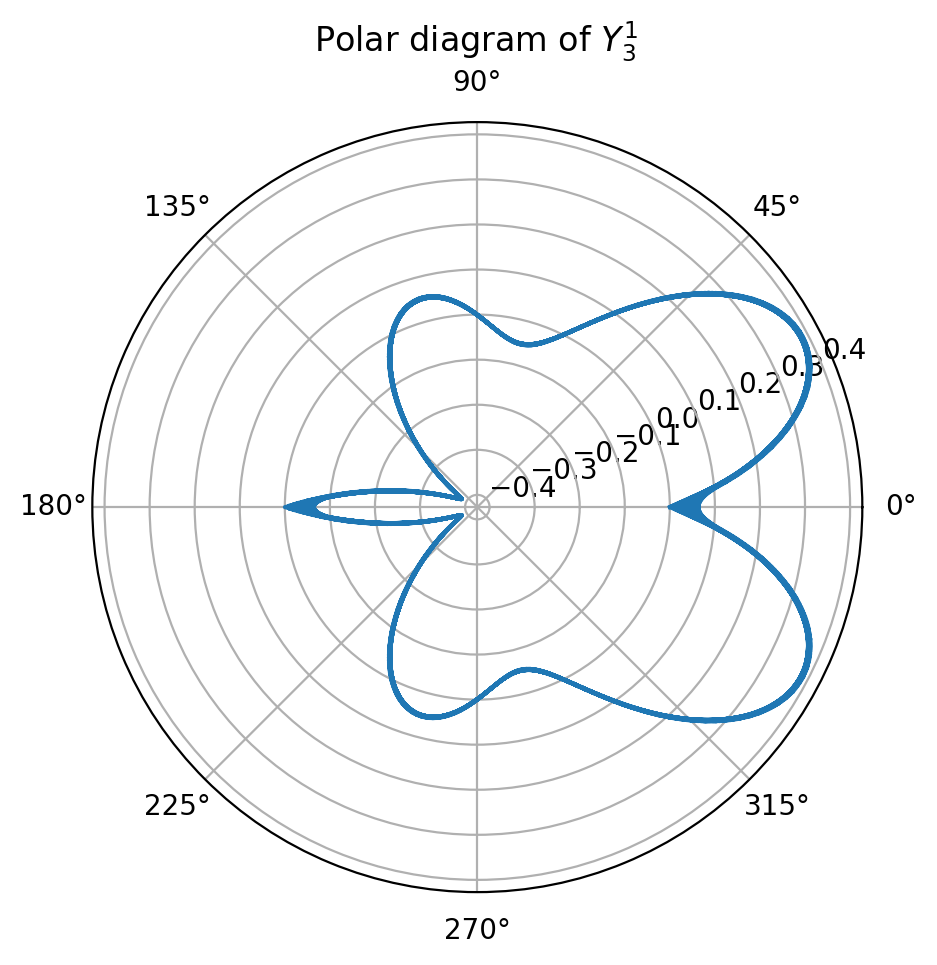

In [ ]:
plot_graphs2(3, 1)

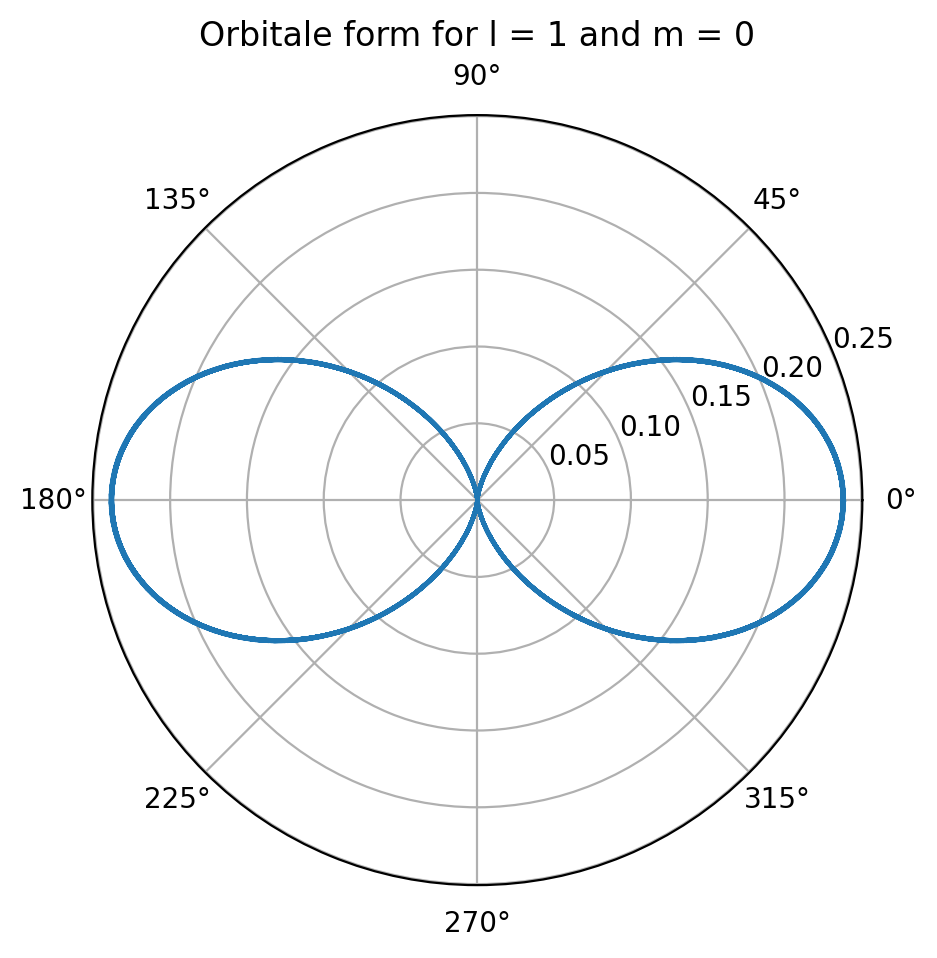

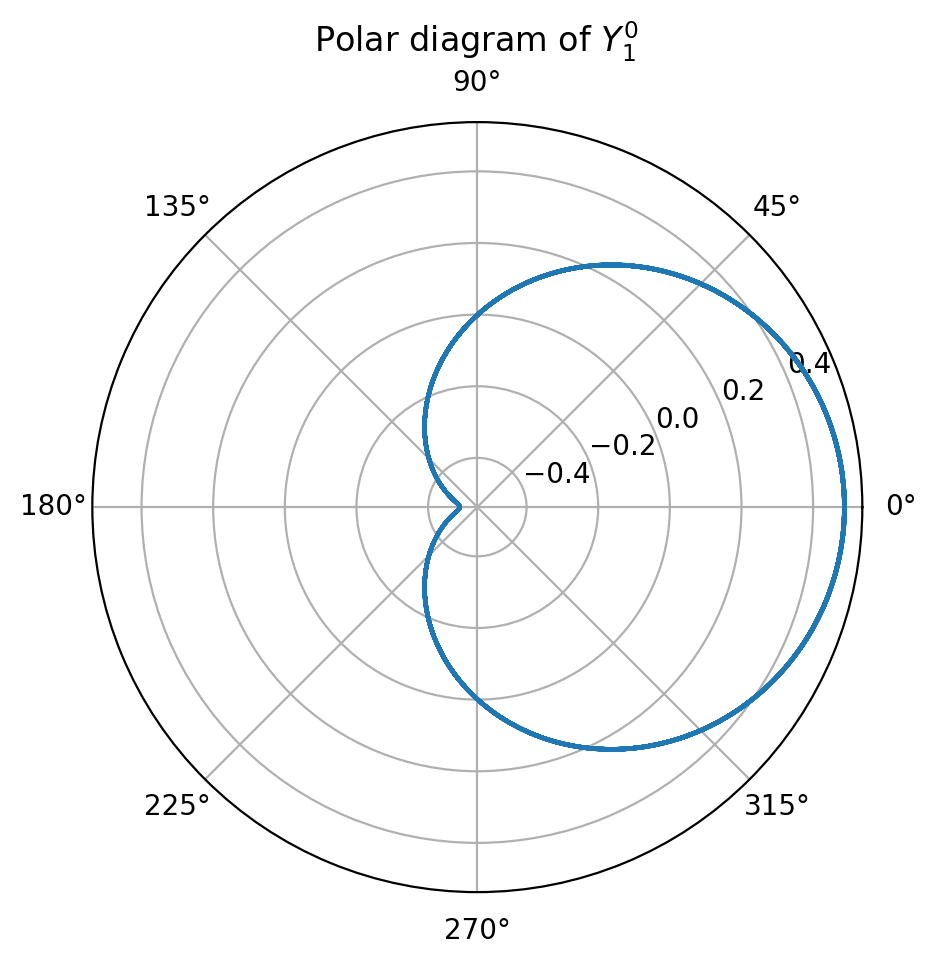

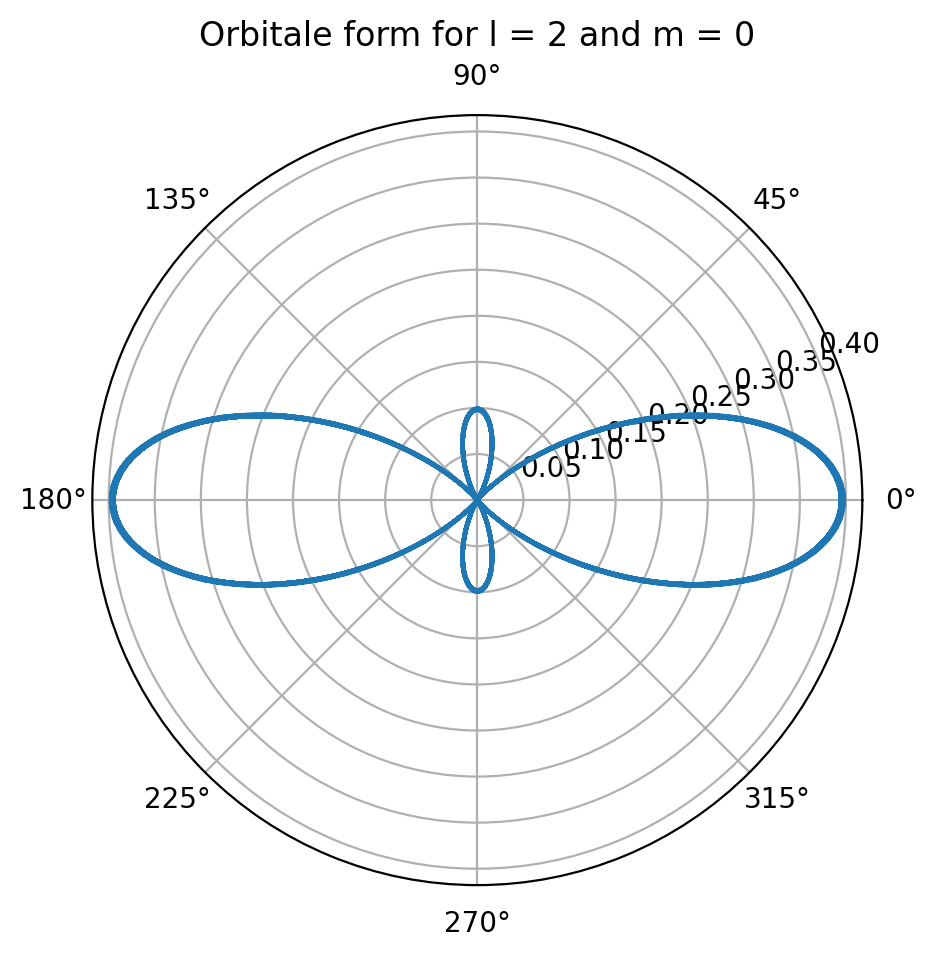

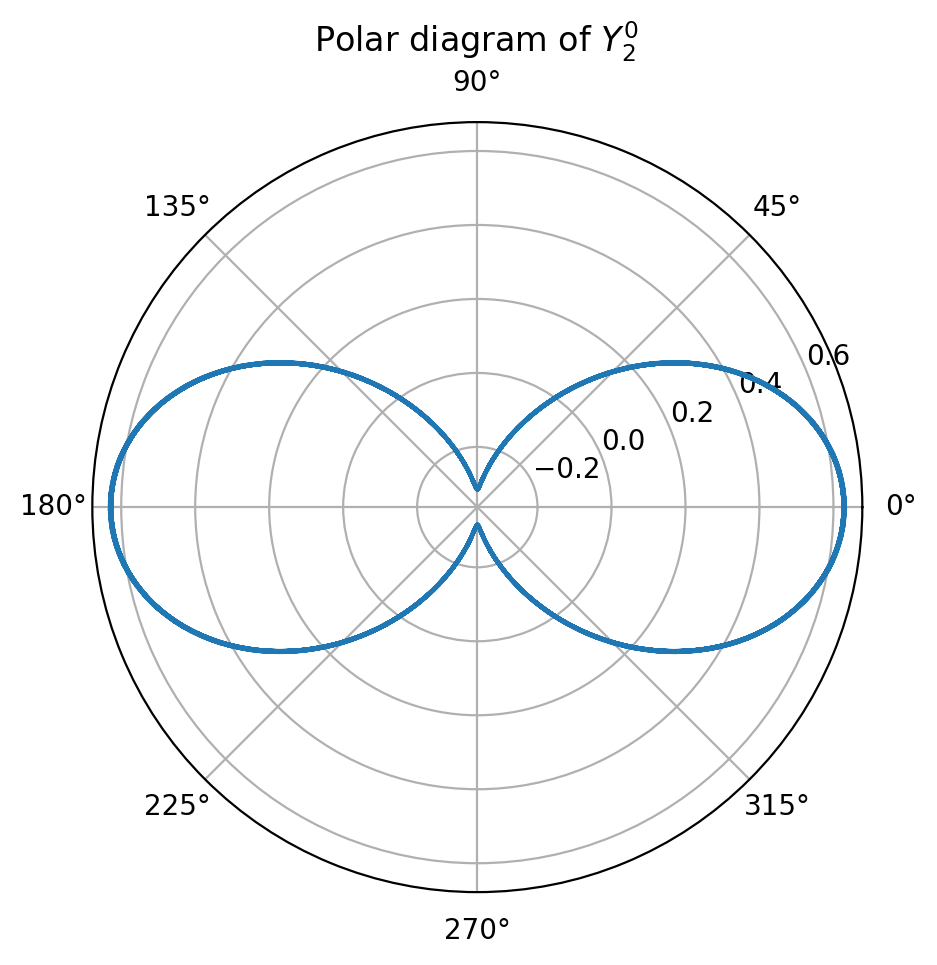

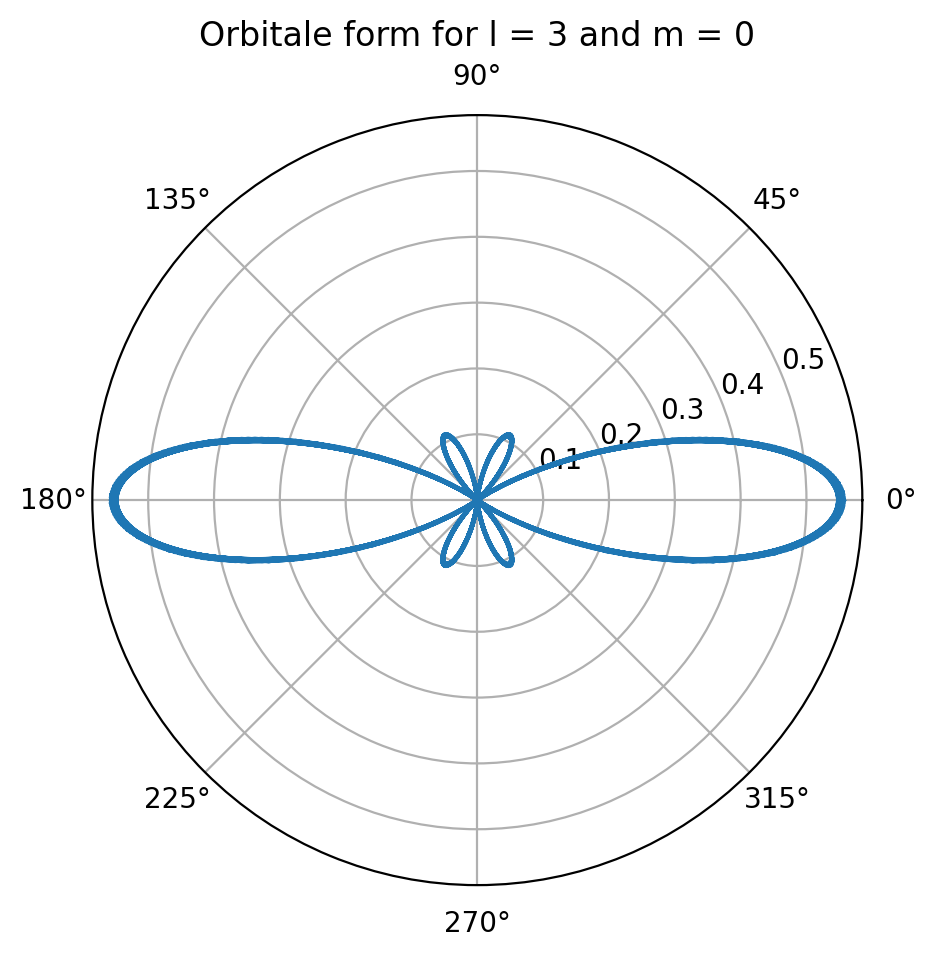

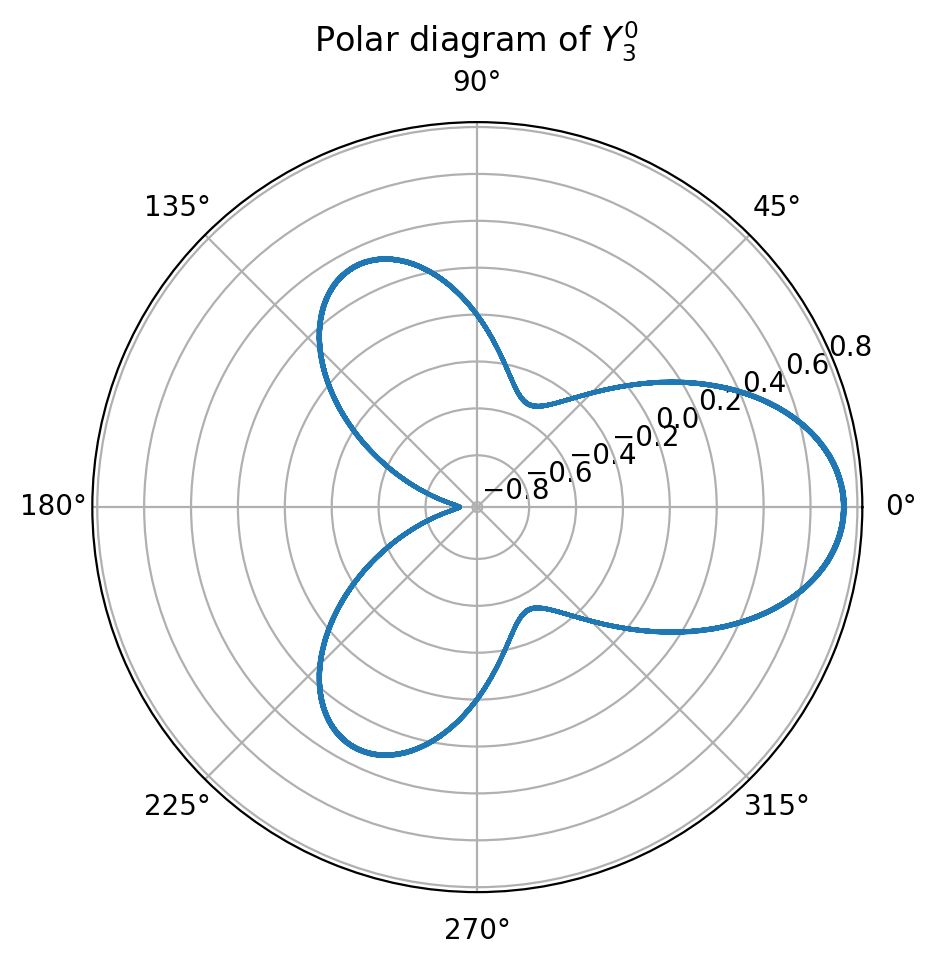

In [ ]:
for l in range (1, 4):
    plot_graphs(l,0)

## Часть 2

Радиальные функции вычисляются по формуле:

$R_{nl}(ρ)=(\frac{2}{n})^\frac{3}{2}⋅\sqrt{\frac{(n-l-1)!}{2n(n+l)!}}⋅e^{-\frac{ρ}{n}}⋅(\frac{2ρ}{n})^l⋅
L^{2l+1}_{n-l-1}(\frac{2ρ}{n})$,

где $L$ — присоединённый полином Лагерра.

Радиальные функции при $n=1$:

$R_{10}(ρ)=2\sqrt{\frac{1}{a^3}}e^{-ρ}$

Радиальные функции при $n=2$:

$R_{20}(ρ)=\sqrt{\frac{1}{8a^3}}e^{-\frac{ρ}{2}}(2-ρ)$

$R_{21}(ρ)=\frac{1}{\sqrt{3}}\sqrt{\frac{1}{8a^3}}e^{-\frac{ρ}{2}}(ρ)$

Радиальные функции при $n=3$:

$R_{30}(ρ)=\frac{2}{27}\sqrt{\frac{1}{27a^3}}e^{-\frac{ρ}{3}}(27-18ρ+2ρ^2)$

$R_{31}(ρ)=\frac{1}{27}\sqrt{\frac{8}{27a^3}}e^{-\frac{ρ}{3}}ρ(6-ρ)$

$R_{32}(ρ)=\frac{4}{27\sqrt{10}}\sqrt{\frac{1}{27a^3}}e^{-\frac{ρ}{3}}ρ^2$

Графики в десмосе: https://www.desmos.com/calculator/0hhnstaeza?lang=ru

In [ ]:
from scipy.special import factorial, assoc_laguerre

def R(r,n,l):
    return (2.0/n)**(3/2)*np.sqrt(factorial(n-l-1)/(2.0*n*factorial(n+l)))*np.exp(-r/n)*(2.0*r/n)**l*assoc_laguerre(2.0*r/n,n-l-1,2*l+1)

### Графики $R_{nl}(\rho)$ для $n = 1, 2, 3$

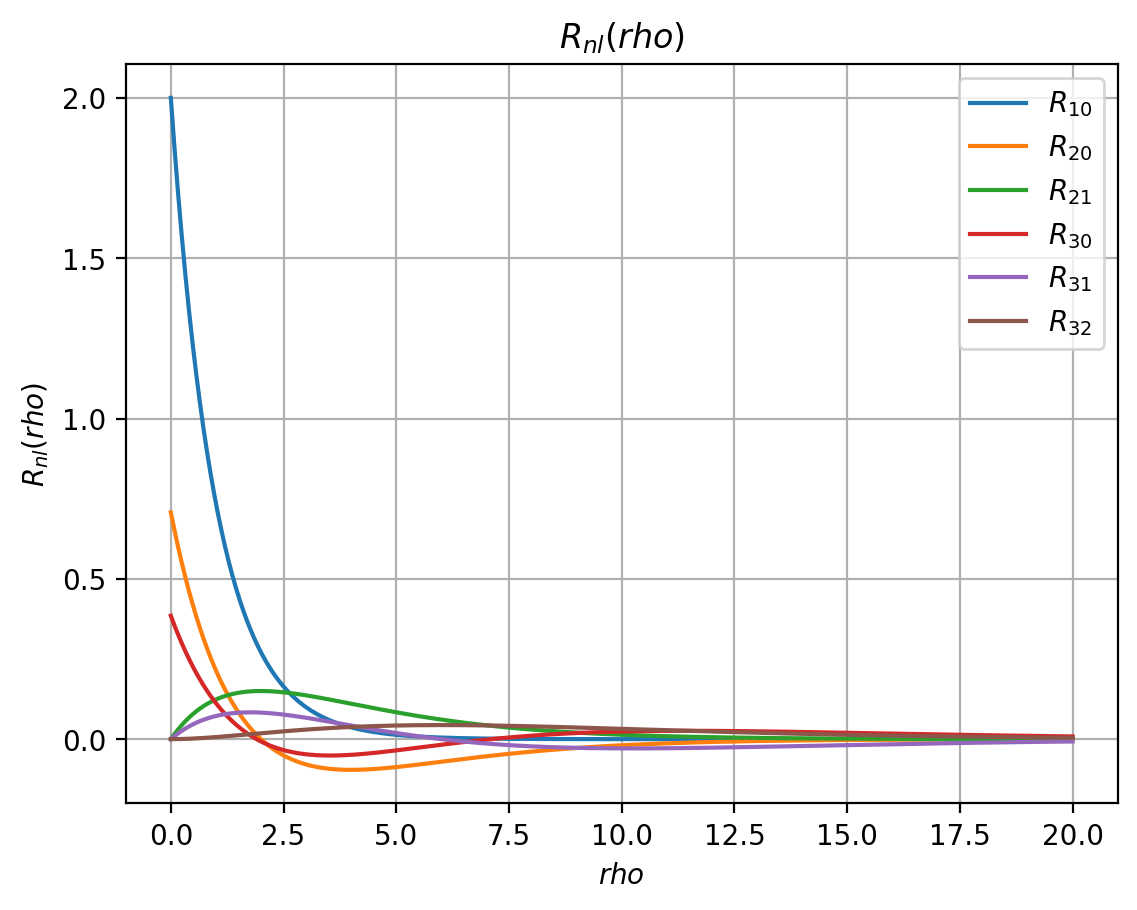

In [ ]:
r = np.linspace(0,20,500)
plt.title('$R_{nl}(rho)$')
R10 = R(r,n=1,l=0)
R20 = R(r,n=2,l=0)
R21 = R(r,n=2,l=1)
R30 = R(r,n=3,l=0)
R31 = R(r,n=3,l=1)
R32 = R(r,n=3,l=2)
ax = plt.gca()
ax.set_xlabel('$rho$')
ax.set_ylabel('$R_{nl}(rho)$')
ax.grid()
plt.plot(r, R10, label='$R_{10}$')
plt.plot(r, R20, label='$R_{20}$')
plt.plot(r, R21, label='$R_{21}$')
plt.plot(r, R30, label='$R_{30}$')
plt.plot(r, R31, label='$R_{31}$')
plt.plot(r, R32, label='$R_{32}$')
plt.legend()

### Графики для $|R_{nl}(ρ)|^2$ для $n = 1, 2, 3$

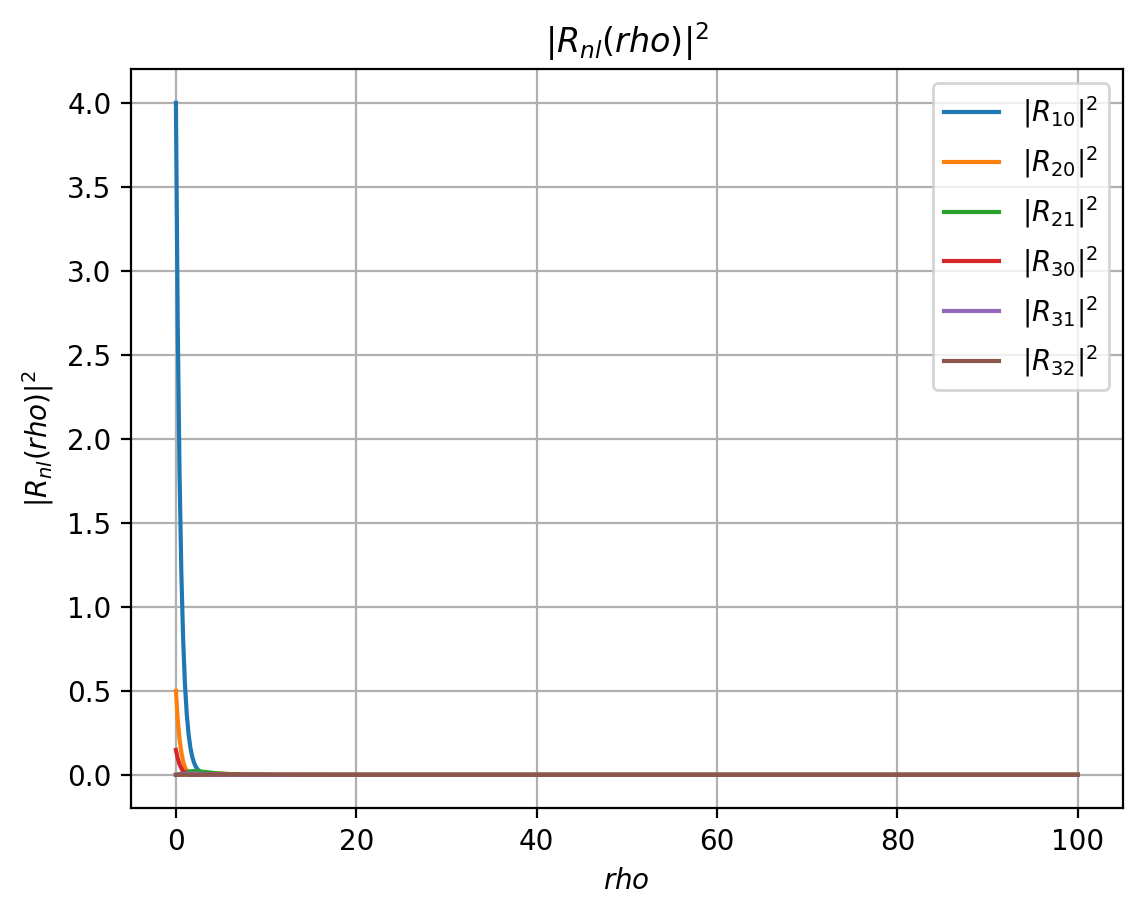

In [ ]:
#Чтобы лучше рассмотреть графики, можно комментировать остальные
r = np.linspace(0,100,500)
plt.title('$|R_{nl}(rho)|^2$')
R10 = R(r,n=1,l=0)**2
R20 = R(r,n=2,l=0)**2
R21 = R(r,n=2,l=1)**2
R30 = R(r,n=3,l=0)**2
R31 = R(r,n=3,l=1)**2
R32 = R(r,n=3,l=2)**2
ax = plt.gca()
ax.set_xlabel('$rho$')
ax.set_ylabel('$|R_{nl}(rho)|^2$')
ax.grid()
plt.plot(r, R10, label='$|R_{10}|^2$')
plt.plot(r, R20, label='$|R_{20}|^2$')
plt.plot(r, R21, label='$|R_{21}|^2$')
plt.plot(r, R30, label='$|R_{30}|^2$')
plt.plot(r, R31, label='$|R_{31}|^2$')
plt.plot(r, R32, label='$|R_{32}|^2$')
plt.legend()

### Графики для $|R_{nl}(ρ)|^24πr^2$ для $n = 1, 2, 3$

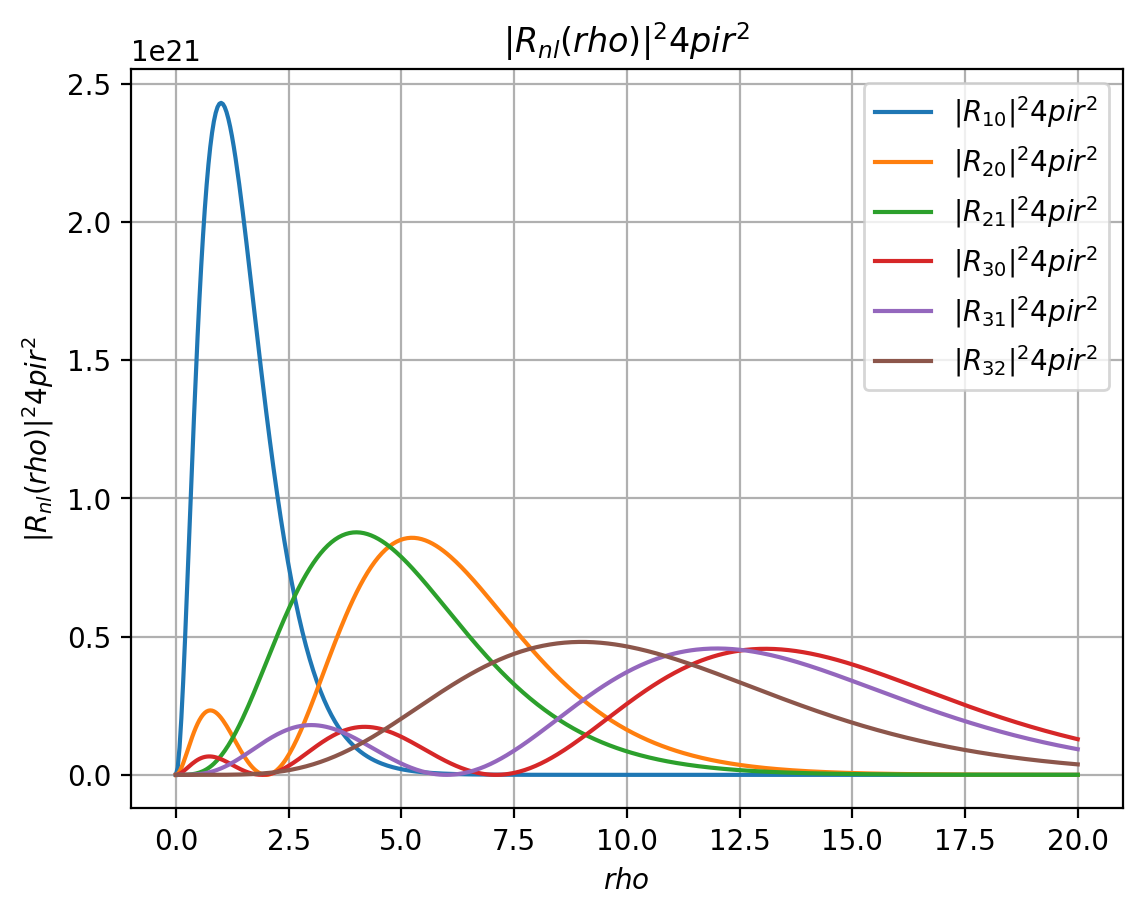

In [ ]:
r = np.linspace(0,20,500)
a0 = 5.29*10**(-11)
s = 4*np.pi*(r/a0)**2
plt.title('$|R_{nl}(rho)|^24pir^2$')
R10 = R(r,n=1,l=0)**2*s
R20 = R(r,n=2,l=0)**2*s
R21 = R(r,n=2,l=1)**2*s
R30 = R(r,n=3,l=0)**2*s
R31 = R(r,n=3,l=1)**2*s
R32 = R(r,n=3,l=2)**2*s
ax = plt.gca()
ax.set_xlabel('$rho$')
ax.set_ylabel('$|R_{nl}(rho)|^24pir^2$')
ax.grid()
plt.plot(r, R10, label='$|R_{10}|^24pir^2$')
plt.plot(r, R20, label='$|R_{20}|^24pir^2$')
plt.plot(r, R21, label='$|R_{21}|^24pir^2$')
plt.plot(r, R30, label='$|R_{30}|^24pir^2$')
plt.plot(r, R31, label='$|R_{31}|^24pir^2$')
plt.plot(r, R32, label='$|R_{32}|^24pir^2$')
plt.legend()

### Полярные диграммы состояний $\psi_{100},\psi_{200},\psi_{300}$

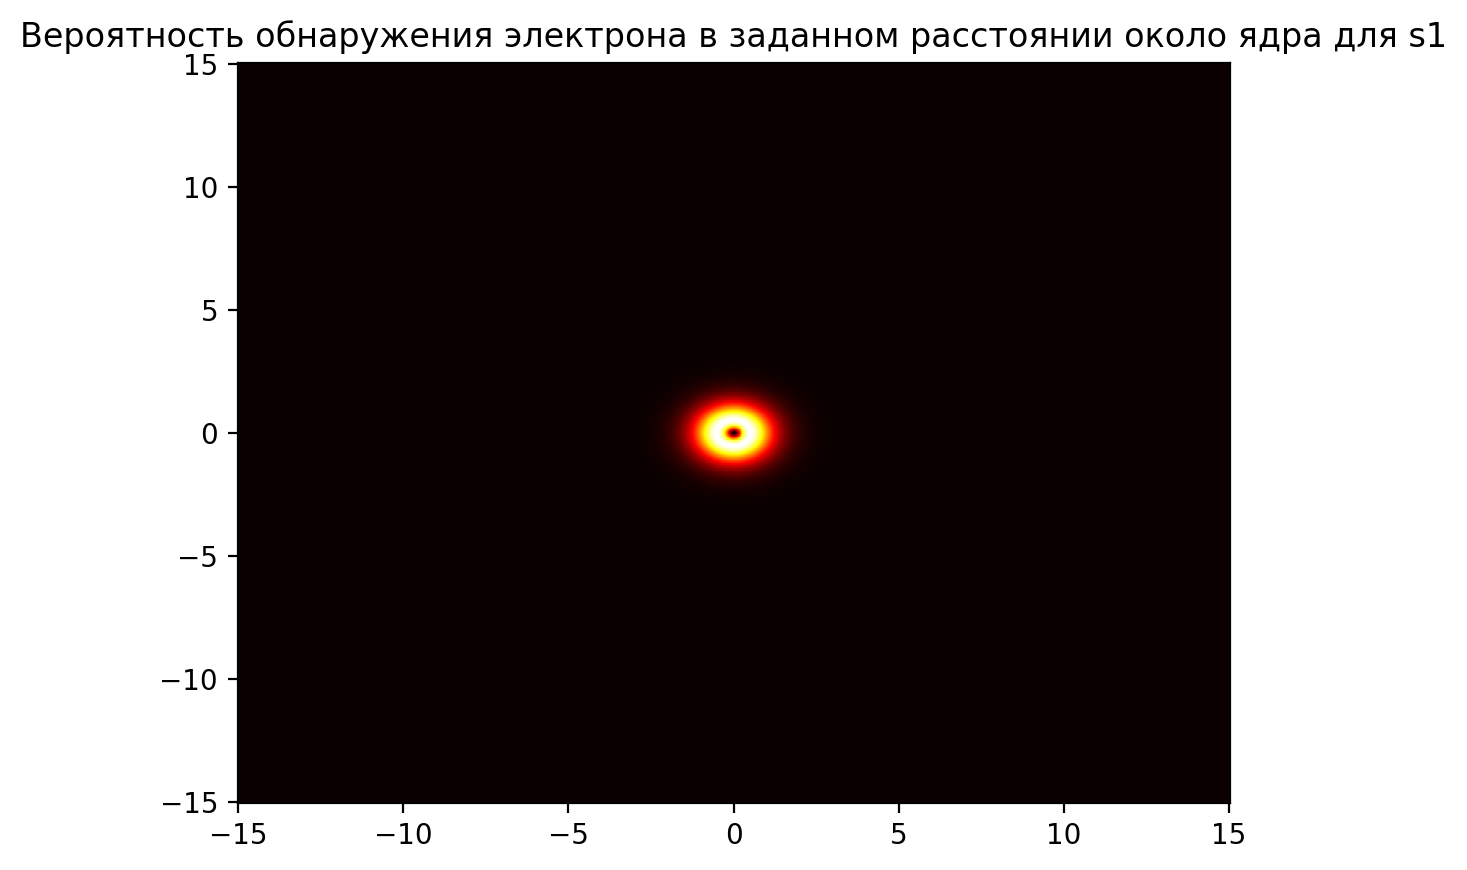

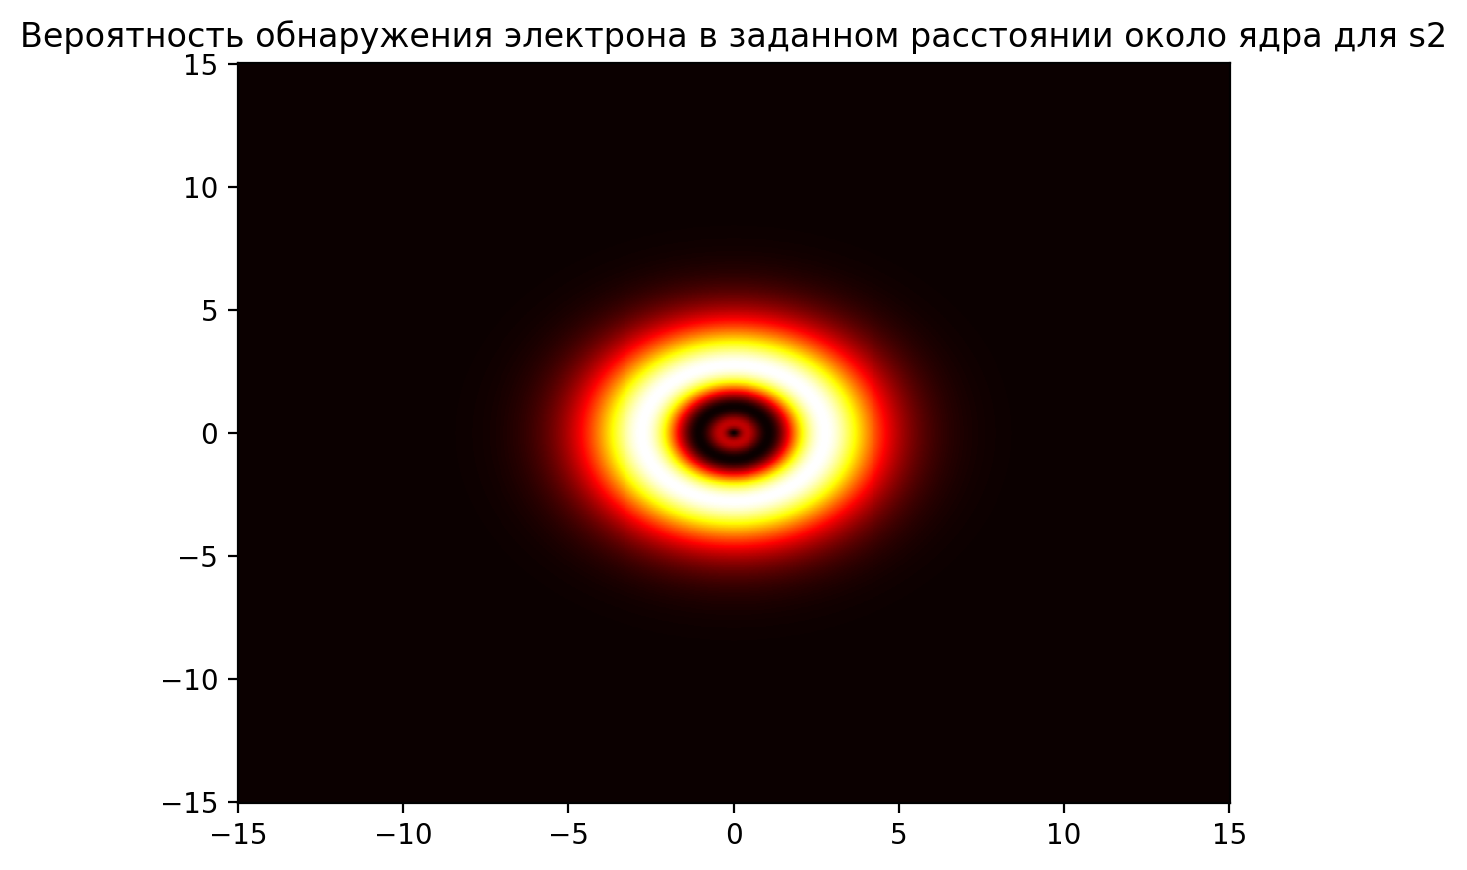

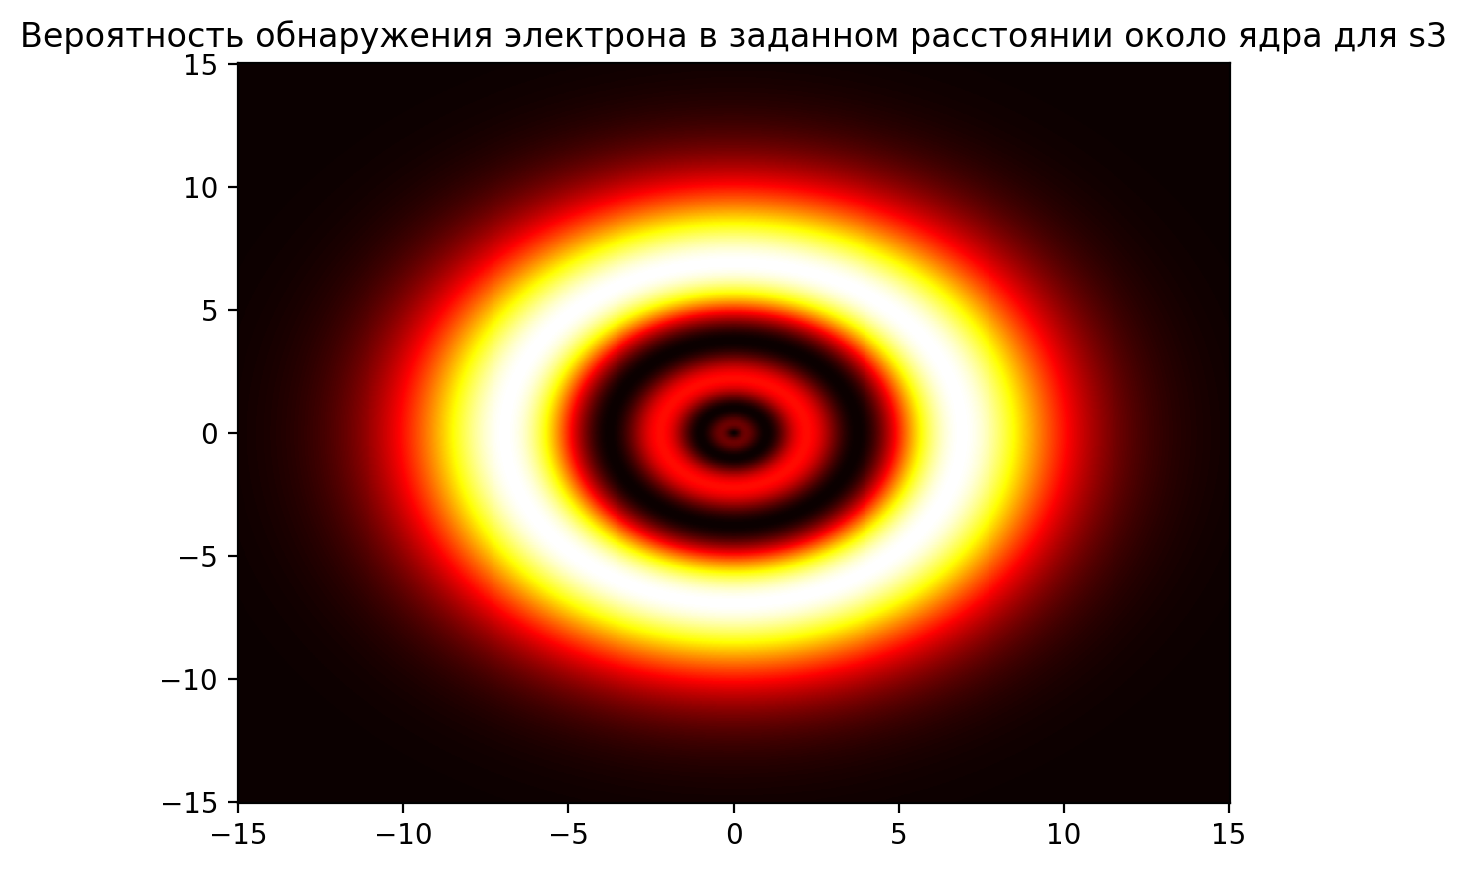

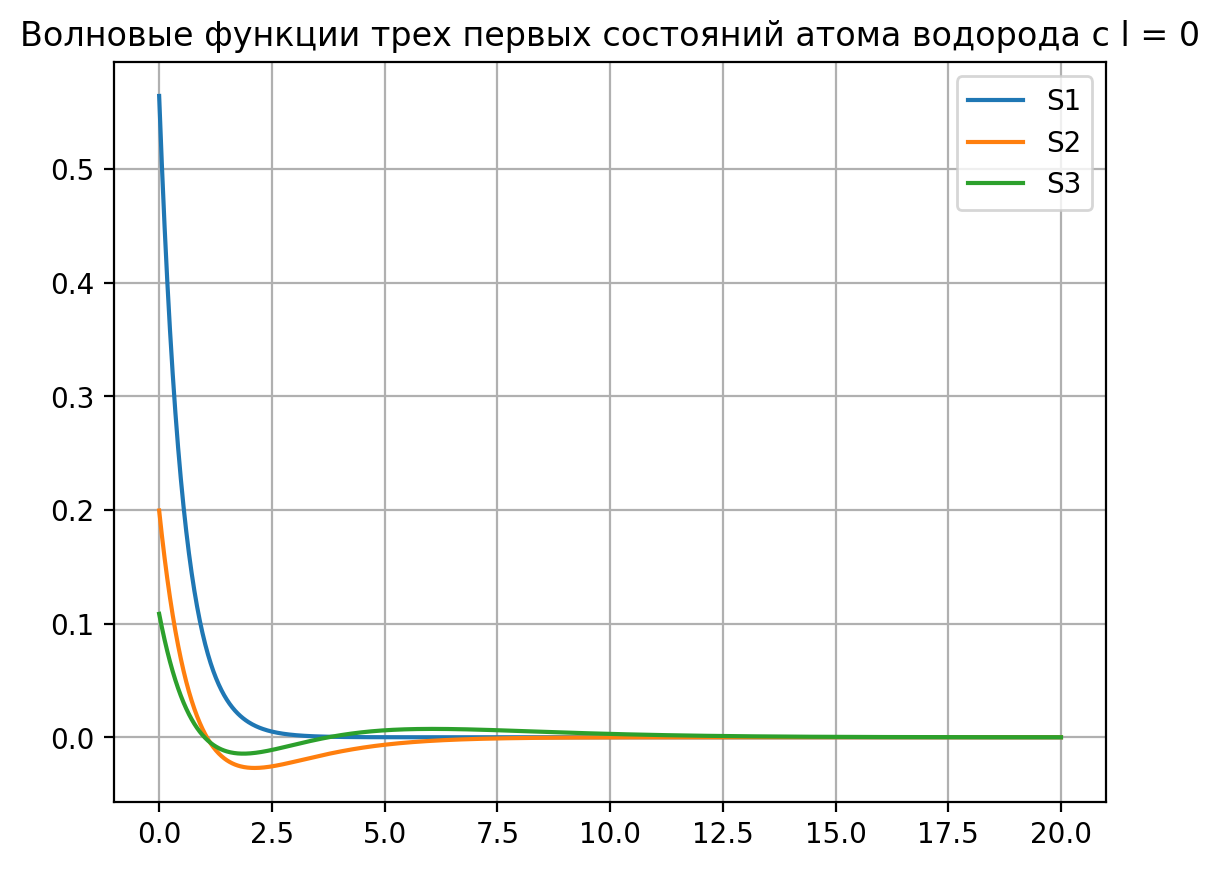

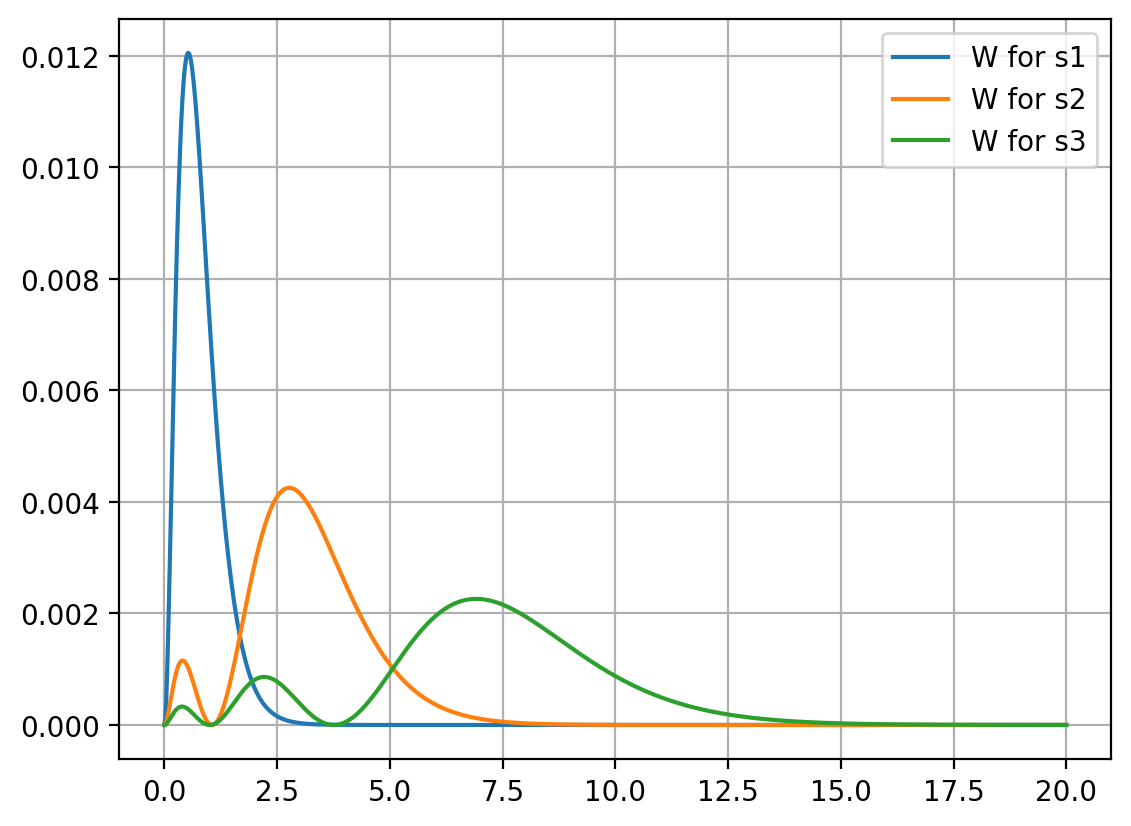

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator


def WPlot(l):
  left, right, n = -15, 15, 1000

  X = np.linspace(left, right, n)
  Y = np.linspace(left, right, n)
  X, Y = np.meshgrid(X, Y)

  Y00 = 1 / np.sqrt(4 * np.pi)
  a = 0.529
  Ro = np.sqrt(X**2 + Y**2)
  Z = Ro**2 * (R(Ro / a, n=l, l=0) * Y00)**2

  return X, Y, Z


for i in range(1, 4):
  fig, ax = plt.subplots()
  X, Y, Z = WPlot(i)
  plt.title(f'Вероятность обнаружения электрона в заданном расстоянии около ядра для s{i}')
  ax.pcolormesh(X, Y, Z, cmap ='hot')



Y00 = 1 / np.sqrt(4 * np.pi)
a = 0.529
left, right, n = 0, 20, 1000
r = np.linspace(left, right, n)
w10 = R(r / a, n=1, l=0) * Y00
w20 = R(r / a, n=2, l=0) * Y00
w30 = R(r / a, n=3, l=0) * Y00


fig, ax = plt.subplots()
ax.plot(r, w10, label="S1")
ax.plot(r, w20, label="S2")
ax.plot(r, w30, label="S3")
plt.title('Волновые функции трех первых состояний атома водорода с l = 0')

ax.grid(True)
ax.legend()
plt.show()

fig_w, ax_w = plt.subplots()
ax_w.plot(r, w10**2 * r**2, label="W for s1")
ax_w.plot(r, w20**2 * r**2, label="W for s2")
ax_w.plot(r, w30**2 * r**2, label="W for s3")

ax_w.grid(True)
ax_w.legend()
plt.show()






### Вычисление уровней энергии и длины и частоты волны, излучаемой атомом

In [ ]:
def E(n, z):
  eps0 = 8.85 * 10**(-12)
  m = 9.10 * 10**(-31)
  h = 6.64 * 10**(-34)
  e = 1.6*10**(-19)
  return - (m * e ** 4 * z ** 2) / (8 * (eps0 * n * h) ** 2)

def Omega(i, k, z):
  hbar = 1.05 * 10**(-34)
  return (E(i, 1) - E(k, 1)) / hbar


i = 1 # уровень энергии
E_i = E(i, 1) # Энергия водородободобного электрона на i-ом уровне
print(f"Энергия водородободобного электрона на {i}-ом уровне", E_i, "Дж")
i_from, i_to = 1, 3 # переход с уровня i_from на уровень i_to
w = Omega(i_from, i_to, 1)
print(f"Частота, соответствующая энергии перехода с {i_from}-го уроня на {i_to}-ый равна", w, "Гц")
c = 299792458
print("Длина волны при этом равна", 2 * math.pi * c / w, "м")


Энергия водородободобного электрона на 1-ом уровне -2.1587812423316244e-18 Дж
Частота, соответствующая энергии перехода с 1-го уроня на 3-ый равна -1.827539676047936e+16 Гц
Длина волны при этом равна -1.030703514674034e-07 м
